In [132]:
import pandas as pd

In [133]:
df = pd.read_json('employees.json')
df.head()

,employee_id,name,phone,job_role,work_location,salary,managed_by
0,1,Andrea Nixon,2228198798,Designer,New York,106207,NaN
1,2,Jonathan Banks,1385879441,Data Analyst,San Francisco,91282,NaN
2,3,Dana Adams,2757941137,Software Engineer,New York,130983,NaN
3,4,Benjamin Elliott,5681024988,Designer,New York,107728,NaN
4,5,Jennifer Adams,5652506383,Designer,Austin,85537,NaN


In [134]:
# drop data irrelevant to model
df.drop(columns=['employee_id', 'name', 'phone', 'managed_by'], inplace = True)

In [135]:
columns_to_encode = ['job_role', 'work_location']

# encode job_role & work_location, assign 0/1 column
df_encoded = pd.get_dummies(df[columns_to_encode], prefix=columns_to_encode)

# attach encoded columns to original df
df = pd.concat([df, df_encoded.astype(int)], axis=1)

# drop job_role & work_location columns
df = df.drop(columns=columns_to_encode)

X = df_encoded 
y = df['salary']

# save for processing
preprocessing_details = {
    'encoded_columns': columns_to_encode,
}

import pickle
with open('preprocessing_details.pkl', 'wb') as file:
    pickle.dump(preprocessing_details, file)

In [148]:
df_encoded.columns

Index(['job_role_Data Analyst', 'job_role_Designer', 'job_role_HR Specialist',
       'job_role_Product Manager', 'job_role_Software Engineer',
       'work_location_Austin', 'work_location_Chicago',
       'work_location_New York', 'work_location_San Francisco'],
      dtype='object')

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# split data 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Create Decision Tree Classifier
model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

# make predictions on test set
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'mse: {mse} (working with salary numbers)')
print(f'r2: {r2}')

mse: 9325131.155 (working with salary numbers)
r2: 0.9857822608415634


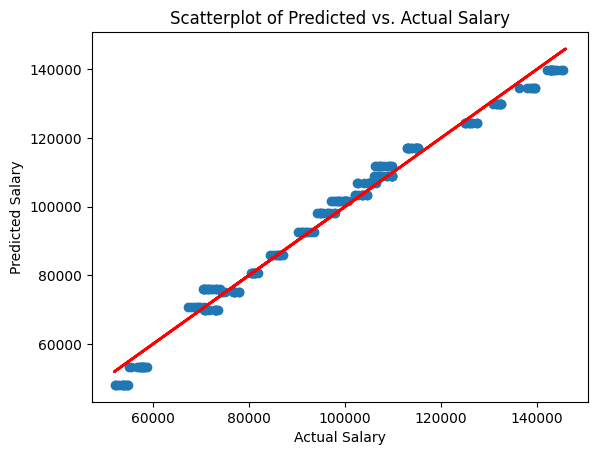

In [141]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Scatterplot of Predicted vs. Actual Salary')
plt.plot(y, y, color='red', linewidth=2)
plt.show()

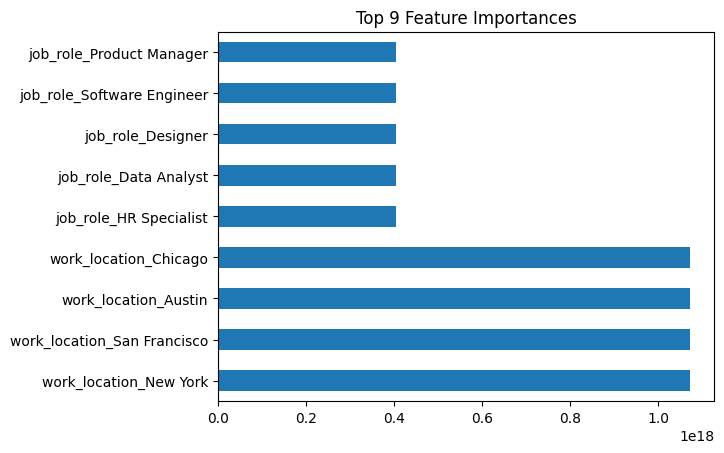

In [142]:
feature_importances = pd.Series(abs(model.coef_), index = X.columns)
feature_importances.nlargest(9).plot(kind='barh')
plt.title('Top 9 Feature Importances')
plt.show()

In [143]:
import pickle
with open('salary_model.pkl', 'wb') as file:
    pickle.dump(model, file)